<a href="https://colab.research.google.com/github/Tanmayshinde2001/Task3_Terrorism/blob/main/Task3_Terrorism_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
pd.options.display.max_rows = 5000 

In [73]:
import warnings
warnings.filterwarnings('ignore')    

Loading the Dataset

In [74]:
terror_data = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

In [75]:

terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [76]:

terror_data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
73873,200203170003,2002,3,17,NaN,0,NaN,97,Israel,10,...,NaN,"Daniel Rubin and Michael Matza, Handgun, Bomb...","Fresh Violence Mars Envoy's Bid for Peace, T...","Alan Philps and Ohad Gozani, Passer-By Kills ...",CETIS,1.0,0.0,0.0,1.0,NaN
73874,200203180001,2002,3,18,NaN,0,NaN,6,Algeria,10,...,NaN,"Bomb Explosion Injures 13 in Algiers, Panafr...","Siobhan Copson, A Bomb Attack Underscores Ris...","Bomb Blast in Algiers, 15 Wounded: Official,...",CETIS,-9.0,-9.0,0.0,-9.0,NaN
73875,200203180002,2002,3,18,NaN,0,NaN,92,India,6,...,NaN,Kashmir Militants Attack Indian Forces Headq...,"Lashkar Strikes Again, Hits But Misses BSF HQ...","Mujtaba Ali Ahmad, Suspected Islamic Militant...",CETIS,1.0,1.0,0.0,1.0,NaN
73876,200203180003,2002,3,18,NaN,1,NaN,92,India,6,...,This is possibly a profit-motivated abduction.,"""No Title,"" Associated Press, March 19, 2002.","""Kidnappers of DC demand ransom,"" Hindustan Ti...","""Manipur rebels kidnap official,"" BBC, March 1...",UMD Schmid 2012,0.0,0.0,0.0,0.0,NaN
73877,200203190001,2002,3,19,NaN,0,NaN,6,Algeria,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting the Size of the Dataset

In [77]:
print("Number of rows in the Dataset :", terror_data.shape[0])
print("Number of columns in the Dataset :", terror_data.shape[1])

Number of rows in the Dataset : 73878
Number of columns in the Dataset : 135


All the column names of the dataset

In [78]:
columns = terror_data.columns.tolist()
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

Renaming Certain Columns

In [79]:
df = pd.DataFrame(terror_data, terror_data.rename(columns={ 'success': 'Success', 'location': 'Location', 'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'country': 'Country_code', 'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True))

In [80]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,Country_code,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


Feature Creation
Here, a new column is added called Total_casualities which represents number of the people harmed (killed + injured) in terrorist attacks.

In [81]:
df['Total_casualities'] = df['Killed'] + df['Wounded']

Feature Extraction
In these section, we extract some of the columns from the dataset and analyze these data to get some useful informaton.



In [82]:
df =  df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','Location','AttackType','Killed','Wounded','Total_casualities','Target','Summary','Group','Target_type','Weapon_type','Motive', 'Success']]


In [83]:
col = df.columns.tolist()
print(col)

['Year', 'Month', 'Extended', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'Location', 'AttackType', 'Killed', 'Wounded', 'Total_casualities', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive', 'Success']


In [84]:
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,...,Killed,Wounded,Total_casualities,Target,Summary,Group,Target_type,Weapon_type,Motive,Success
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,1.0,0.0,1.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,...,0.0,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,...,1.0,0.0,1.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,...,NaN,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,...,NaN,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


Checking for Null Values

In [85]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73878 entries, 0 to 73877
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               73878 non-null  int64  
 1   Month              73878 non-null  int64  
 2   Extended           73878 non-null  int64  
 3   Day                73878 non-null  int64  
 4   Country            73878 non-null  object 
 5   State              73465 non-null  object 
 6   Region             73878 non-null  object 
 7   City               73878 non-null  object 
 8   Latitude           70088 non-null  float64
 9   Longitude          70087 non-null  float64
 10  Location           2837 non-null   object 
 11  AttackType         73878 non-null  object 
 12  Killed             67650 non-null  float64
 13  Wounded            65255 non-null  float64
 14  Total_casualities  64974 non-null  float64
 15  Target             73407 non-null  object 
 16  Summary            774

In [86]:
df.isnull().sum()

Year                     0
Month                    0
Extended                 0
Day                      0
Country                  0
State                  413
Region                   0
City                     0
Latitude              3790
Longitude             3791
Location             71041
AttackType               0
Killed                6228
Wounded               8623
Total_casualities     8904
Target                 471
Summary              66129
Group                    0
Target_type              0
Weapon_type              0
Motive               66438
Success                  0
dtype: int64

Here, we see some null values present in the dataset. But, they are not needed to be handled at this point because we only exploring the data.

Exploratory Data Analysis and Data Visualization
Correlation Heatmap for the featurescorr 

In [87]:
corr  =  df.corr()

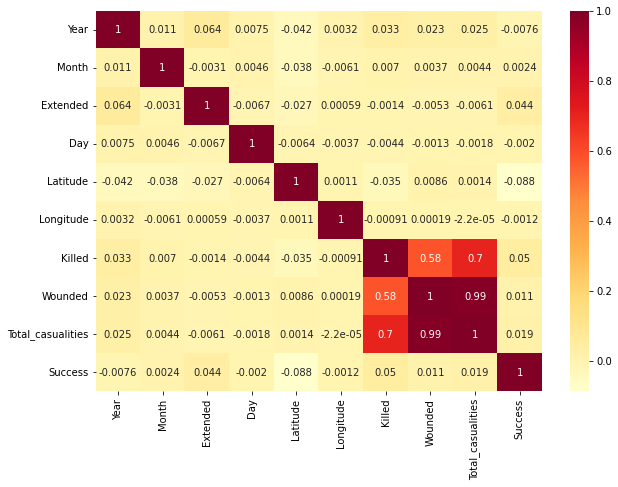

In [88]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot =  True, cmap = 'YlOrRd')
plt.show()

Number of Terrorists Activities per Year
Let's see the visualization between Number of terrorists activities and Year

In [89]:
count =  df['Year'].value_counts()
year = count.index.sort_values(ascending  = True)
val = []
for i in year:
    val.append(count[i])

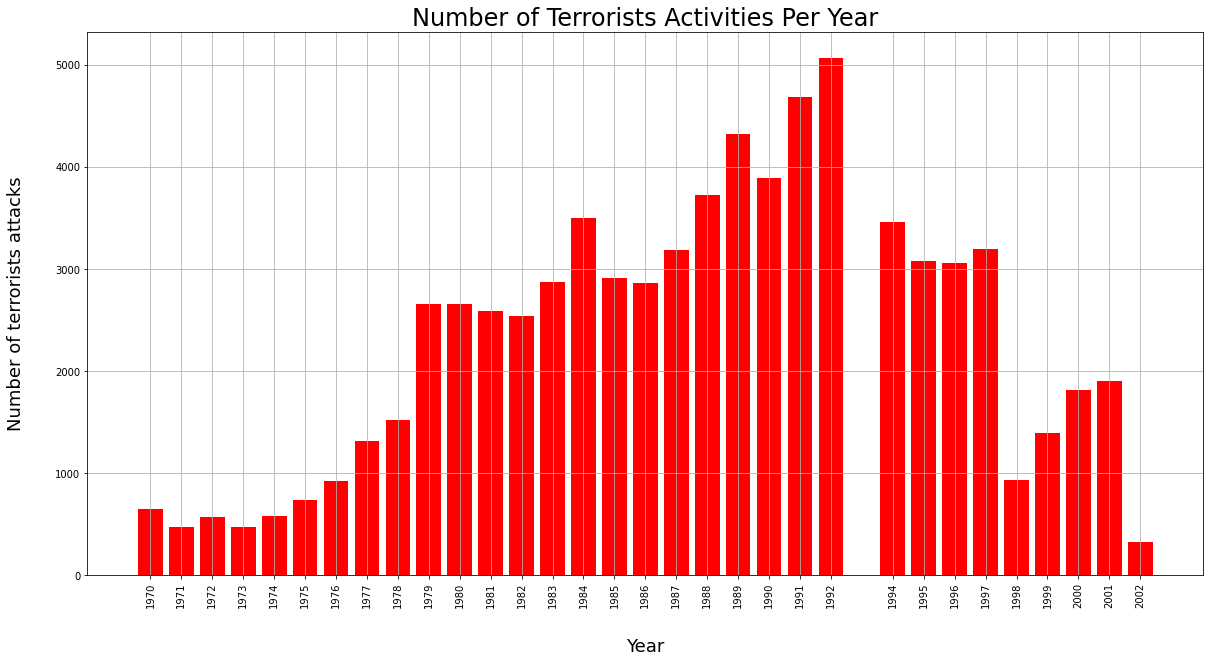

In [90]:
plt.figure(figsize = (20,10))
plt.bar(year, val, tick_label = year, color = 'red')
plt.xticks(rotation  = 90)
plt.title('Number of Terrorists Activities Per Year', fontsize=24)  
plt.xlabel('Year', fontsize = 18, labelpad = 30)
plt.ylabel('Number of terrorists attacks', fontsize = 18, labelpad = 30)
plt.grid(True)
plt.show()


Conclusion:
Generally, as the Time proceeds the Number of Terrorists Attacks also Increased.

The peak in terms of Number of Terrorists Attacks was observed in 2014.
A Decline in terms of Number of Terrorists Attacks has been observed since 2015 which shows the progress towards the mission of reducing such terrorists attacks.

Total Casualties Per Year

In [91]:
Cas_Year  = df.groupby(by = df['Year']).Total_casualities.sum().to_frame().reset_index()


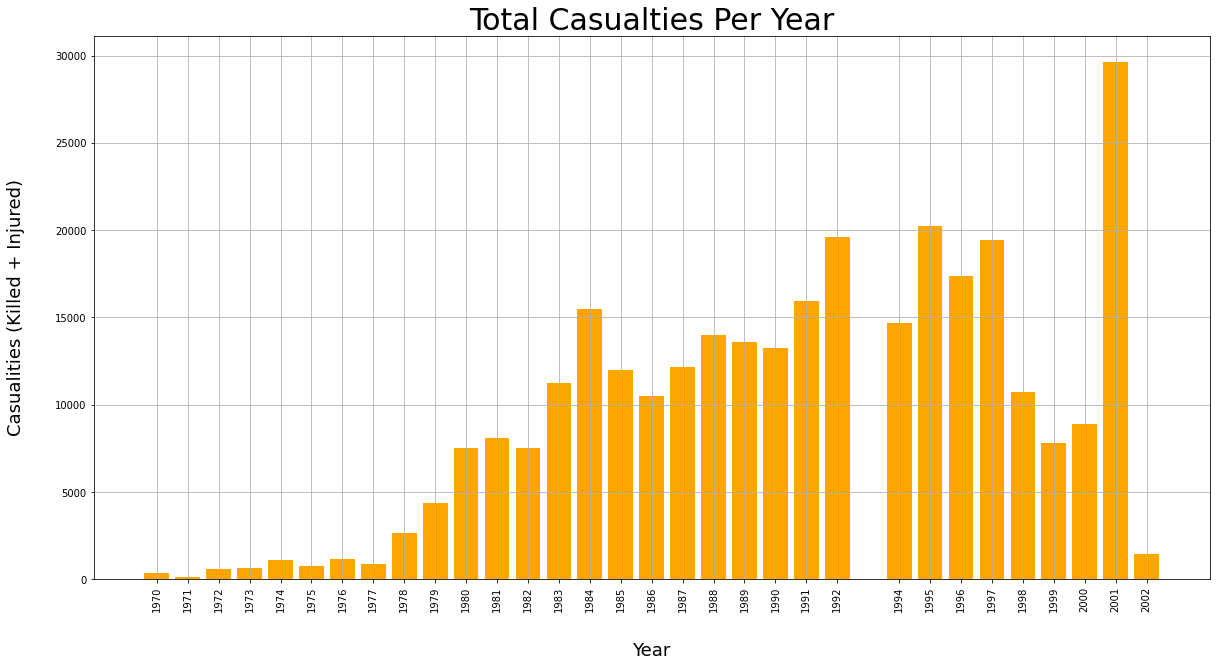

In [92]:
plt.figure(figsize = (20,10))
plt.bar(Cas_Year['Year'], Cas_Year['Total_casualities'], tick_label = Cas_Year['Year'], color =  'orange')
plt.xticks(rotation  = 90)
plt.title('Total Casualties Per Year', fontsize=30)  
plt.grid(True)
plt.xlabel('Year', fontsize = 18, labelpad = 30)
plt.ylabel('Casualities (Killed + Injured)', fontsize = 18, labelpad = 30)
plt.show()


Conclusion:
Generally, as the Time proceeds the Number of People Harmed (Killed or Injured) also Increased Significantly.
The peak in terms of Number of People Harmed was observed in 2015 with 70K+ casualties.
Though there has been a decline in the Number of People Harmed after 2016 but these numbers are still very large and need to be reduced as soon as possible.

In [93]:
country = df['Country'].value_counts().index.tolist()
print("Number of Countries affected by Terrorist Attacks :", len(country))

Number of Countries affected by Terrorist Attacks : 199


Let's see, Top 30 Countries that are affected by Terrorist Attacks

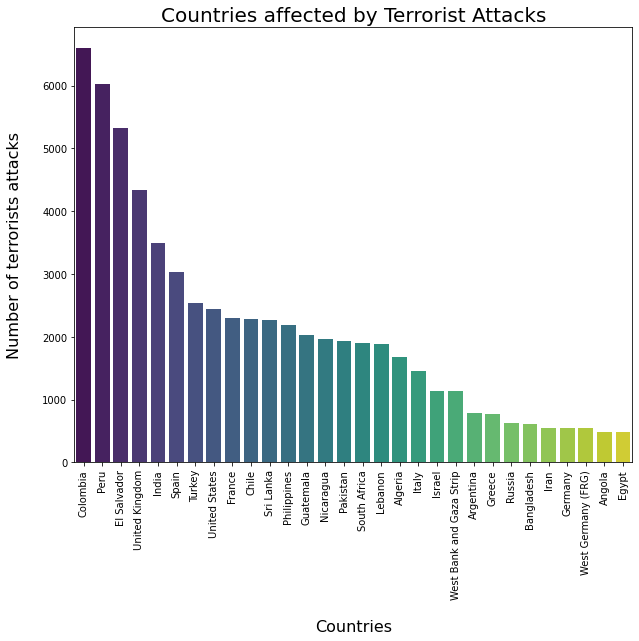

In [94]:
fig = plt.figure(figsize=(10,8))
sns.barplot(df['Country'].value_counts()[0:30].index, df['Country'].value_counts()[0:30].values,palette='viridis',  tick_label = country[0:30])
plt.xticks(rotation = 90)
plt.title('Countries affected by Terrorist Attacks', fontsize =  20)
plt.xlabel('Countries', fontsize = 16, labelpad = 20)
plt.ylabel('Number of terrorists attacks', fontsize = 16, labelpad = 20)
plt.show()

Conclusion:
The above image shows the Top 30 countries in terms of most number of terrorist attacks.
The top country which is most affected by terrorist attacks is Iraq.
The top 5 countries most affected by terrorist attacks are Iraq, Pakistan, Afganistan, India, and Colombia.

Number of Total Casualities in Each Country

In [95]:
count_cas = df.groupby('Country').Total_casualities.sum().to_frame().reset_index().sort_values('Total_casualities', ascending=False)
count_cas.head(30)

,Country,Total_casualities
162,Sri Lanka,23986.0
79,India,23191.0
183,United States,22487.0
34,Colombia,18395.0
51,El Salvador,16181.0
137,Peru,15988.0
2,Algeria,14310.0
138,Philippines,11774.0
97,Lebanon,11148.0
132,Pakistan,10546.0


Let's see, Top 30 Countries in terms of Causalities

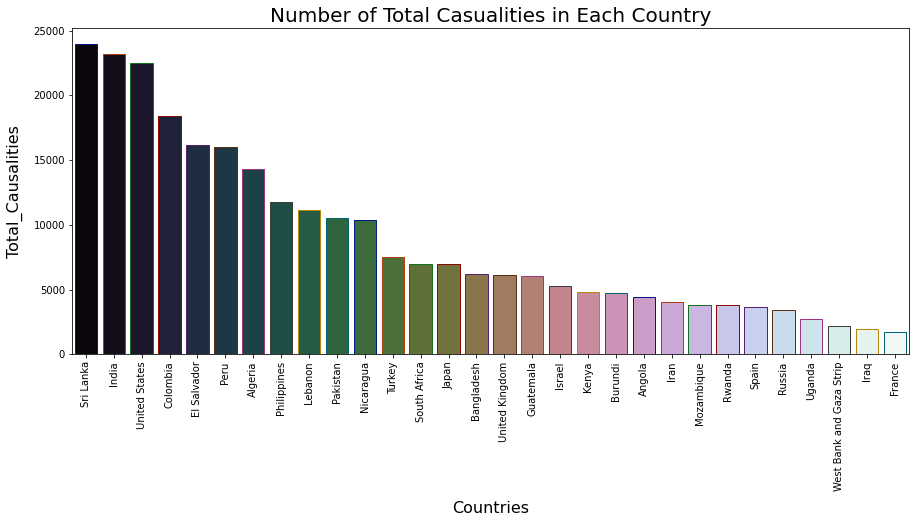

In [96]:
plt.subplots(figsize=(15,6))
sns.barplot(x=count_cas.Country[0:30], y=count_cas.Total_casualities[0:30], palette= 'cubehelix',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Casualities in Each Country', fontsize  = 20)
plt.xlabel("Countries", fontsize = 16, labelpad = 10)
plt.ylabel("Total_Causalities", fontsize = 16, labelpad = 10)
plt.show()

Conclusion:
The above image shows the Most Number of Total Casualities in Each Country.
The most affected country by Total Casualities is Iraq with 200K+ Casualities.
The top 5 countries most affected by terrorist attacks are Iraq, Afganistan, Pakistan, India, Sri Lanka.

Most Affected States by Terrorist Attacks

In [97]:
state_aff = df['State'].value_counts()
print("Number of States affected by Terrorist Attacks :", len(state_aff))

Number of States affected by Terrorist Attacks : 2061


Let's see, Top 30 states affected by the Terrorist Attacks.

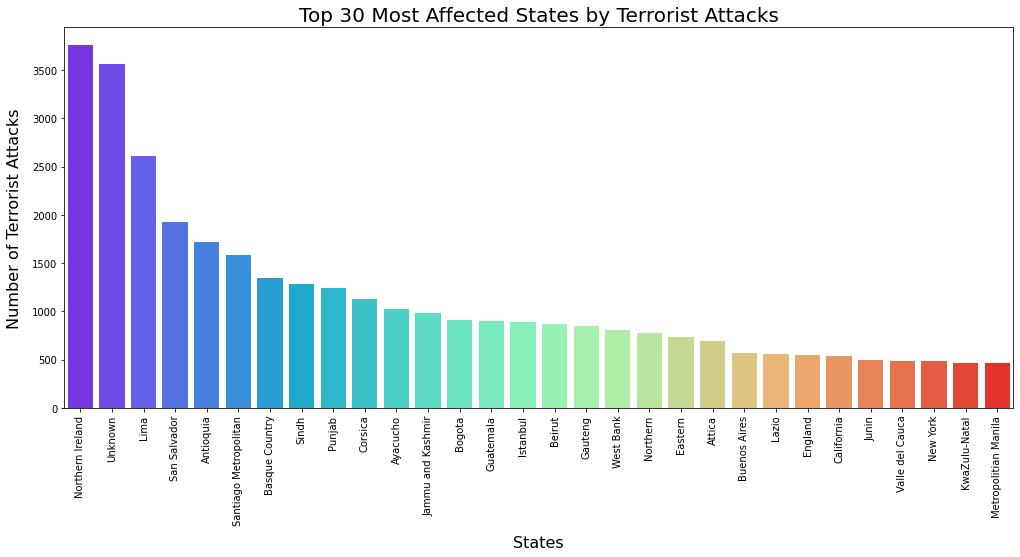

In [98]:
fig = plt.figure(figsize=(17,7))
sns.barplot(state_aff[0:30].index, state_aff[0:30].values, palette='rainbow')
plt.title('Top 30 Most Affected States by Terrorist Attacks', fontsize =  20)
plt.xlabel('States', fontsize = 16, labelpad = 10)
plt.ylabel('Number of Terrorist Attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

Conclusion:
The above image shows the Top 30 states in terms of most number of terrorist attacks.
The most affected state by terrorist attacks is Baghdadm with 7500+ Terrorist Attacks.
The top 5 states most affected by terrorist attacks are Baghdadm, Northern Ireland, Balochistan, Saladin, Al Anbar.

Most Affected Regions by Terrorist Attacks

In [99]:
region_aff = df['Region'].value_counts()
print("Number of Regions affected by the Terrorist Attacks :", len(region_aff))

Number of Regions affected by the Terrorist Attacks : 12


Lets see, Top 30 Regions affected by the Terrorist Attacks

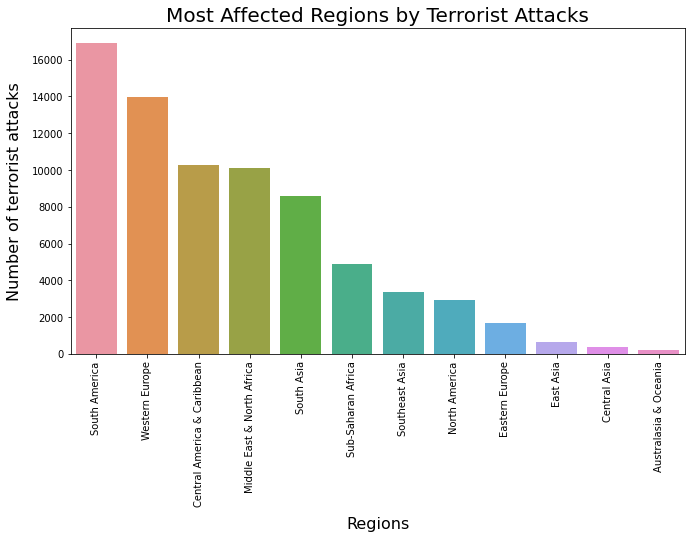

In [100]:
fig = plt.figure(figsize=(11,6))
sns.barplot(region_aff.index, region_aff.values, tick_label = region_aff.index)
plt.title('Most Affected Regions by Terrorist Attacks', fontsize =20)
plt.xlabel('Regions', fontsize = 16, labelpad = 10)
plt.ylabel('Number of terrorist attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

Conclusion:
The above image shows the top regions in terms of most number of terrorist attacks.
The most affected region by terrorist attacks is Middle East and North Africa with 50K+ Terrorist Attacks.
The top 5 regions most affected by terrorist attacks are Middle East & North Africa, South Asia, South America, Sub-Saharan Africa, Western Europe.

Number of Terrorist Attacks v/s Terrorist Groups

In [101]:
terror_grps = df['Group'].value_counts()
print("Number of Terrorist groups that attacks :", len(terror_grps))

Number of Terrorist groups that attacks : 2453


Let's see, Top 10 Terrorist groups with most number of Attacks

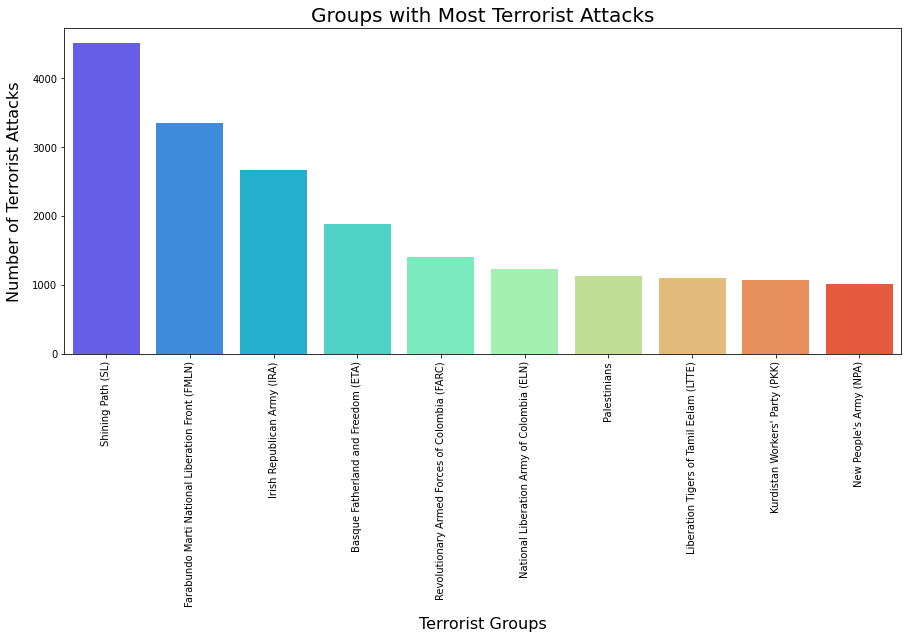

In [102]:
fig = plt.figure(figsize=(15,6))
sns.barplot(terror_grps[1:11].index, terror_grps[1:11].values, palette='rainbow')
plt.title('Groups with Most Terrorist Attacks', fontsize  = 20)
plt.xlabel('Terrorist Groups', fontsize = 16, labelpad = 10)
plt.ylabel('Number of Terrorist Attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

Conclusion:
The above image shows the top Groups with Most No. of Terrorist Attacks.
The Terrorist Group with Most No. of Terrorist Attacks is Taliban with 7K+ Terrorist Attacks.
The top 5 Groups with Most No. of Terrorist Attacks are 'Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)', 'Al-Shabaab'.

Types of Attacks executed by Terrorists

In [103]:
attack_types = df['AttackType'].value_counts()
print("Number of types of attacks executed by Terrorists :", len(attack_types))

Number of types of attacks executed by Terrorists : 9


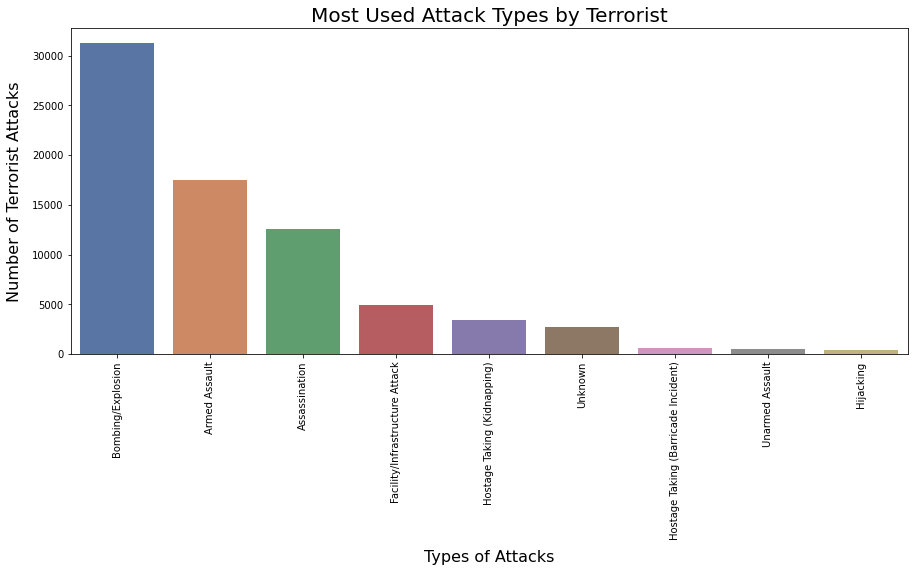

In [104]:
fig = plt.figure(figsize=(15,6))
sns.barplot(attack_types.index, attack_types.values, palette='deep')
plt.xticks(rotation=90)
plt.title("Most Used Attack Types by Terrorist", fontsize  = 20)
plt.xlabel("Types of Attacks", fontsize = 16, labelpad = 10)
plt.ylabel("Number of Terrorist Attacks", fontsize = 16, labelpad = 10)
plt.show()

Conclusion:
The above image shows the Most Used Attack Types by Terrorists.
The Most Used Attack Type by Terrorists is Bombing/Explosion.
The top 5 Attack Types used by Terrorists are Bombing/Explosion, Armed Assault, Assassination, Hostage Taking (Kidnapping), Facility/Infrastructure Attack.

Most frequent targets of terrorists

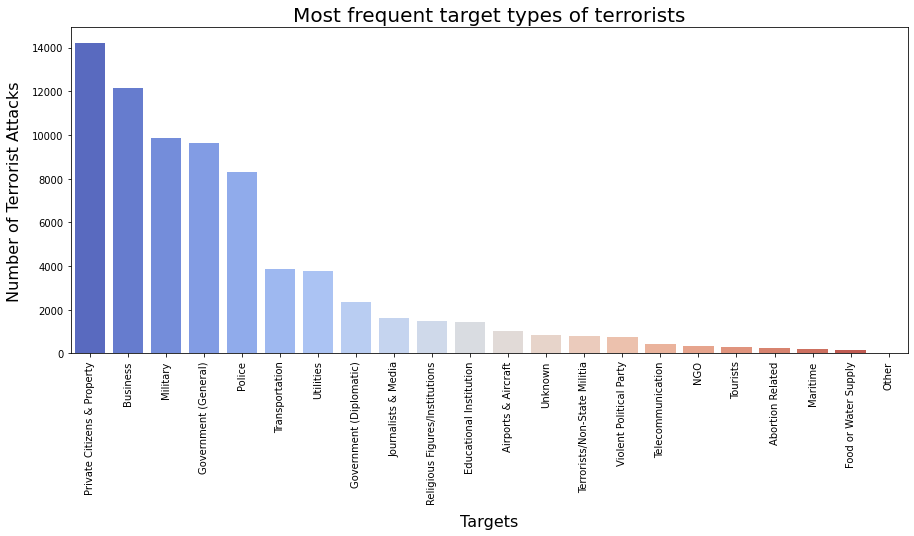

In [105]:
fig = plt.figure(figsize=(15,6))
sns.countplot('Target_type', data=df, order = df['Target_type'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Most frequent target types of terrorists", fontsize =  20)
plt.xlabel("Targets", fontsize = 16, labelpad =  10)
plt.ylabel("Number of Terrorist Attacks", fontsize = 16, labelpad = 10)
plt.show()

Conclusion:
The above image shows the Most frequent target types of terrorists.
The Most frequent target type of terrorists is Private Citizens & Property.
The top 5 Most frequent target type of terrorists are 'Private Citizens & Property', 'Military', 'Police', 'Government (General)', 'Business'.

FINAL OUTCOMES

The most affected region by terrorist attacks is Middle East and North Africa with 50K+ Terrorist Attacks.
The country which is most affected by terrorist attacks is Iraq.
The peak in terms of Number of Terrorists Attacks was observed in 2014.
The peak in terms of Number of People Harmed was observed in 2015 with 70K+ casualties.
The most affected Country by Total Casualities is Iraq with 200K+ Casualities.
The most affected State by Terrorist Attacks is Baghdadm with 7500+ Terrorist Attacks.
The Terrorist Group with Most No. of Terrorist Attacks is Taliban with 7K+ Terrorist Attacks.
The Most Used Attack Type by Terrorists is Bombing/Explosion.
The Most frequent target type of terrorists is Private Citizens & Property.
</b>